<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week09_%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D_CH08_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B4%80%EA%B3%84%EC%84%B1_%EC%B0%BE%EA%B8%B0/week09_%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D_CH08_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B4%80%EA%B3%84%EC%84%B1_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH08_행복지수_데이터_관계성_찾기
날짜: 25년 05월 12일

### 8.1 [상관분석] 행복지수 데이터 분석하기

In [ ]:
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 데이터 불러오기

In [ ]:
df2020 = pd.read_csv('/content/Drive/MyDrive/data/2020.csv', index_col=0)
df2021 = pd.read_csv('/content/Drive/MyDrive/data/2021.csv', index_col=0)

- 데이터 확인하기

In [ ]:
df2020.head()
df2021.head()

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839
4,Iceland,7.554,7.670,7.438,10.878,0.983,73.0,0.955,0.160,2.967
5,Netherlands,7.464,7.518,7.410,10.932,0.942,72.4,0.913,0.175,2.798


- 데이터 삭제하기

In [ ]:
df2020.drop(['upperwhisker','lowerwhisker','Dystopia'], axis=1, inplace=True)
df2021.drop(['upperwhisker','lowerwhisker','Dystopia'], axis=1, inplace=True)

In [ ]:
df2020.head()
df2021.head()

,Country name,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175


- 컬럼명 바꾸기

In [ ]:
df2020.columns = ['Country', 'Score', 'GDP.per.capita',
                  'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']

df2021.columns = ['Country', 'Score', 'GDP.per.capita',
                  'Social.support', 'Life.expectancy', 'Freedom', 'Generosity']

- 컬럼명 출력

In [ ]:
df2020.head()

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
2,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
3,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
4,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
5,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533


In [ ]:
df2021.head()

,Country,Score,GDP.per.capita,Social.support,Life.expectancy,Freedom,Generosity
Rank,,,,,,,
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175


- 새로운 데이터프레임 생성

In [ ]:
df1 = df2020.copy() # 원본을 유지하기 위해 copy하기
df1.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df1

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.8087,10.639267,0.949172
2,Denmark,7.6456,10.774001,0.951444
3,Switzerland,7.5599,10.979933,0.921337
4,Iceland,7.5045,10.772559,0.948892
5,Norway,7.4880,11.087804,0.955750
...,...,...,...,...
149,Central African Republic,3.4759,6.625160,0.640881
150,Rwanda,3.3123,7.600104,0.900589
151,Zimbabwe,3.2992,7.865712,0.711458


- 상관계수 구하기

In [ ]:
df1.drop(['Country'], axis=1, inplace=True)
corr=df1.corr()
corr
corr['Score'].sort_values(ascending=False)

,Score
Score,1.000000
GDP.per.capita,0.775374
Freedom,0.590597


- 히트맵으로 그래프 그리기

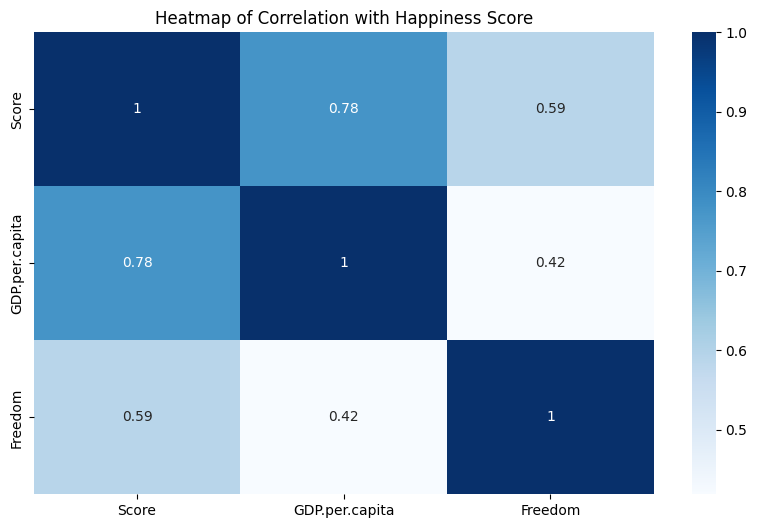

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap of Correlation with Happiness Score')
plt.show()

- 새로운 데이터프레임 생성하기

In [ ]:
df2 = df2021.copy()
df2.drop(['Social.support', 'Life.expectancy', 'Generosity'], axis=1, inplace=True)
df2

,Country,Score,GDP.per.capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919
4,Iceland,7.554,10.878,0.955
5,Netherlands,7.464,10.932,0.913
...,...,...,...,...
145,Lesotho,3.512,7.926,0.715
146,Botswana,3.467,9.782,0.824
147,Rwanda,3.415,7.676,0.897


- 히트맵으로 그래프 그리기

<Axes: >

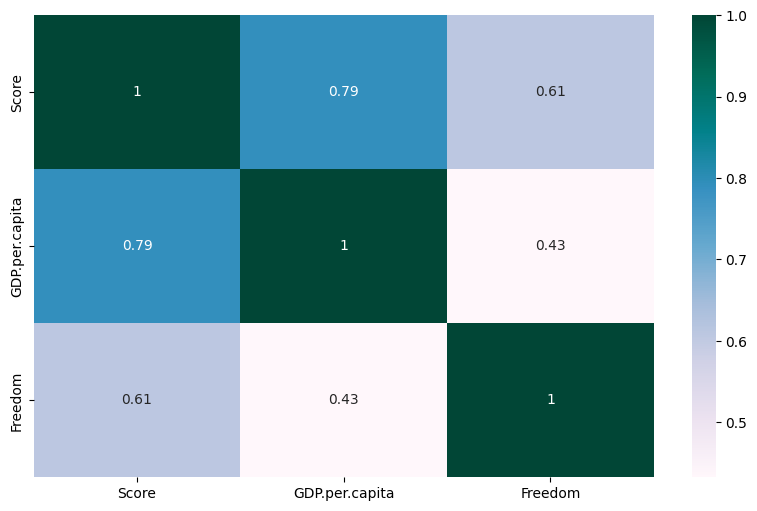

In [ ]:
corr = df2.select_dtypes(include='number').corr() # 상관계수 구하려면 숫자형 데이터만 있어야됨
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='PuBuGn')

- 우리나라는 몇등일까?

In [ ]:
economy = df2020.loc[:, ['Country', 'GDP.per.capita']]
economy = economy.groupby(economy.Country)['GDP.per.capita'].mean().sort_values(ascending=False)
eco = economy.rank(method='min', ascending=False)['South Korea']

social = df2020.loc[:, ['Country', 'Social.support']]
social = social.groupby(social.Country)['Social.support'].mean().sort_values(ascending=False)
soc = social.rank(method='min', ascending=False)['South Korea']

health = df2020.loc[:, ['Country', 'Life.expectancy']]
health = health.groupby(health.Country)['Life.expectancy'].mean().sort_values(ascending=False)
hea = health.rank(method='min', ascending=False)['South Korea']

free = df2020.loc[:, ['Country', 'Freedom']]
free = free.groupby(free.Country)['Freedom'].mean().sort_values(ascending=False)
fre = free.rank(method='min', ascending=False)['South Korea']

print(f'153개국 중 대한민국의 순위:\n경제적 지원 순위: {eco.astype(int)}위\n사회적 지원 순위: {soc.astype(int)}위\n기대수명 순위: {hea.astype(int)}위\n자유도 순위: {fre.astype(int)}위')


153개국 중 대한민국의 순위:
경제적 지원 순위: 27위
사회적 지원 순위: 99위
기대수명 순위: 10위
자유도 순위: 140위


- 전체 변수 간의 상관관계  
- df2020 안에 'Country' 같은 문자열 데이터가 포함되어있음.
- .corr()은 숫자형 데이터만 계산할 수 있어서 자꾸 오류가 났던거임


<Axes: >

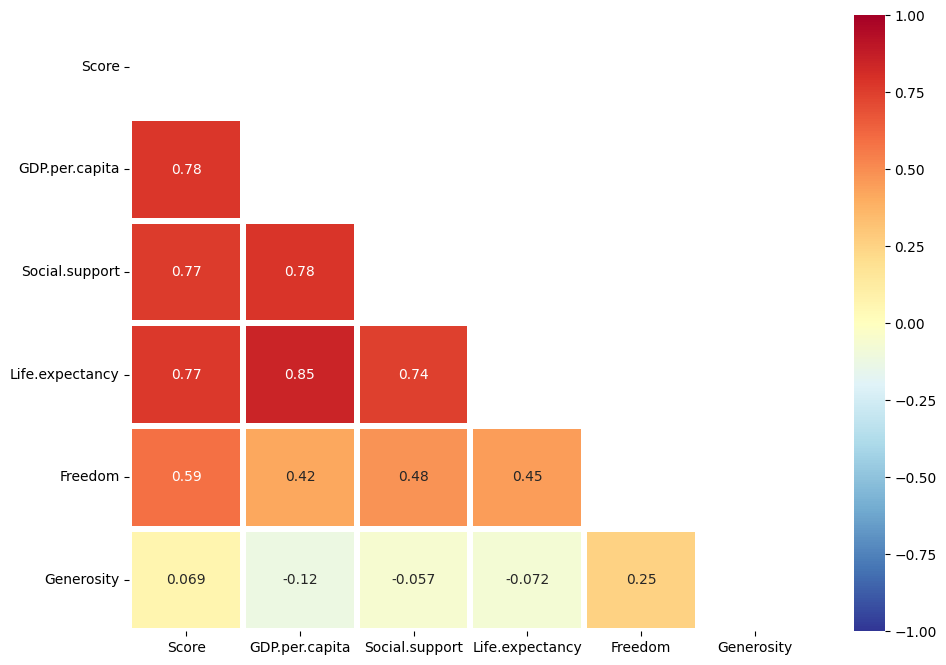

In [ ]:
import numpy as np
corr = df2020.drop(columns=['Country']).corr() # 오류나서 변경한 부분
corr['Score']

plt.figure(figsize=(11, 8))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True,
            cmap='RdYlBu_r', linewidths=4)

- 산점도 그래프 그리기: 상위 50위 국가의 기대수명과 GDP와의 관계

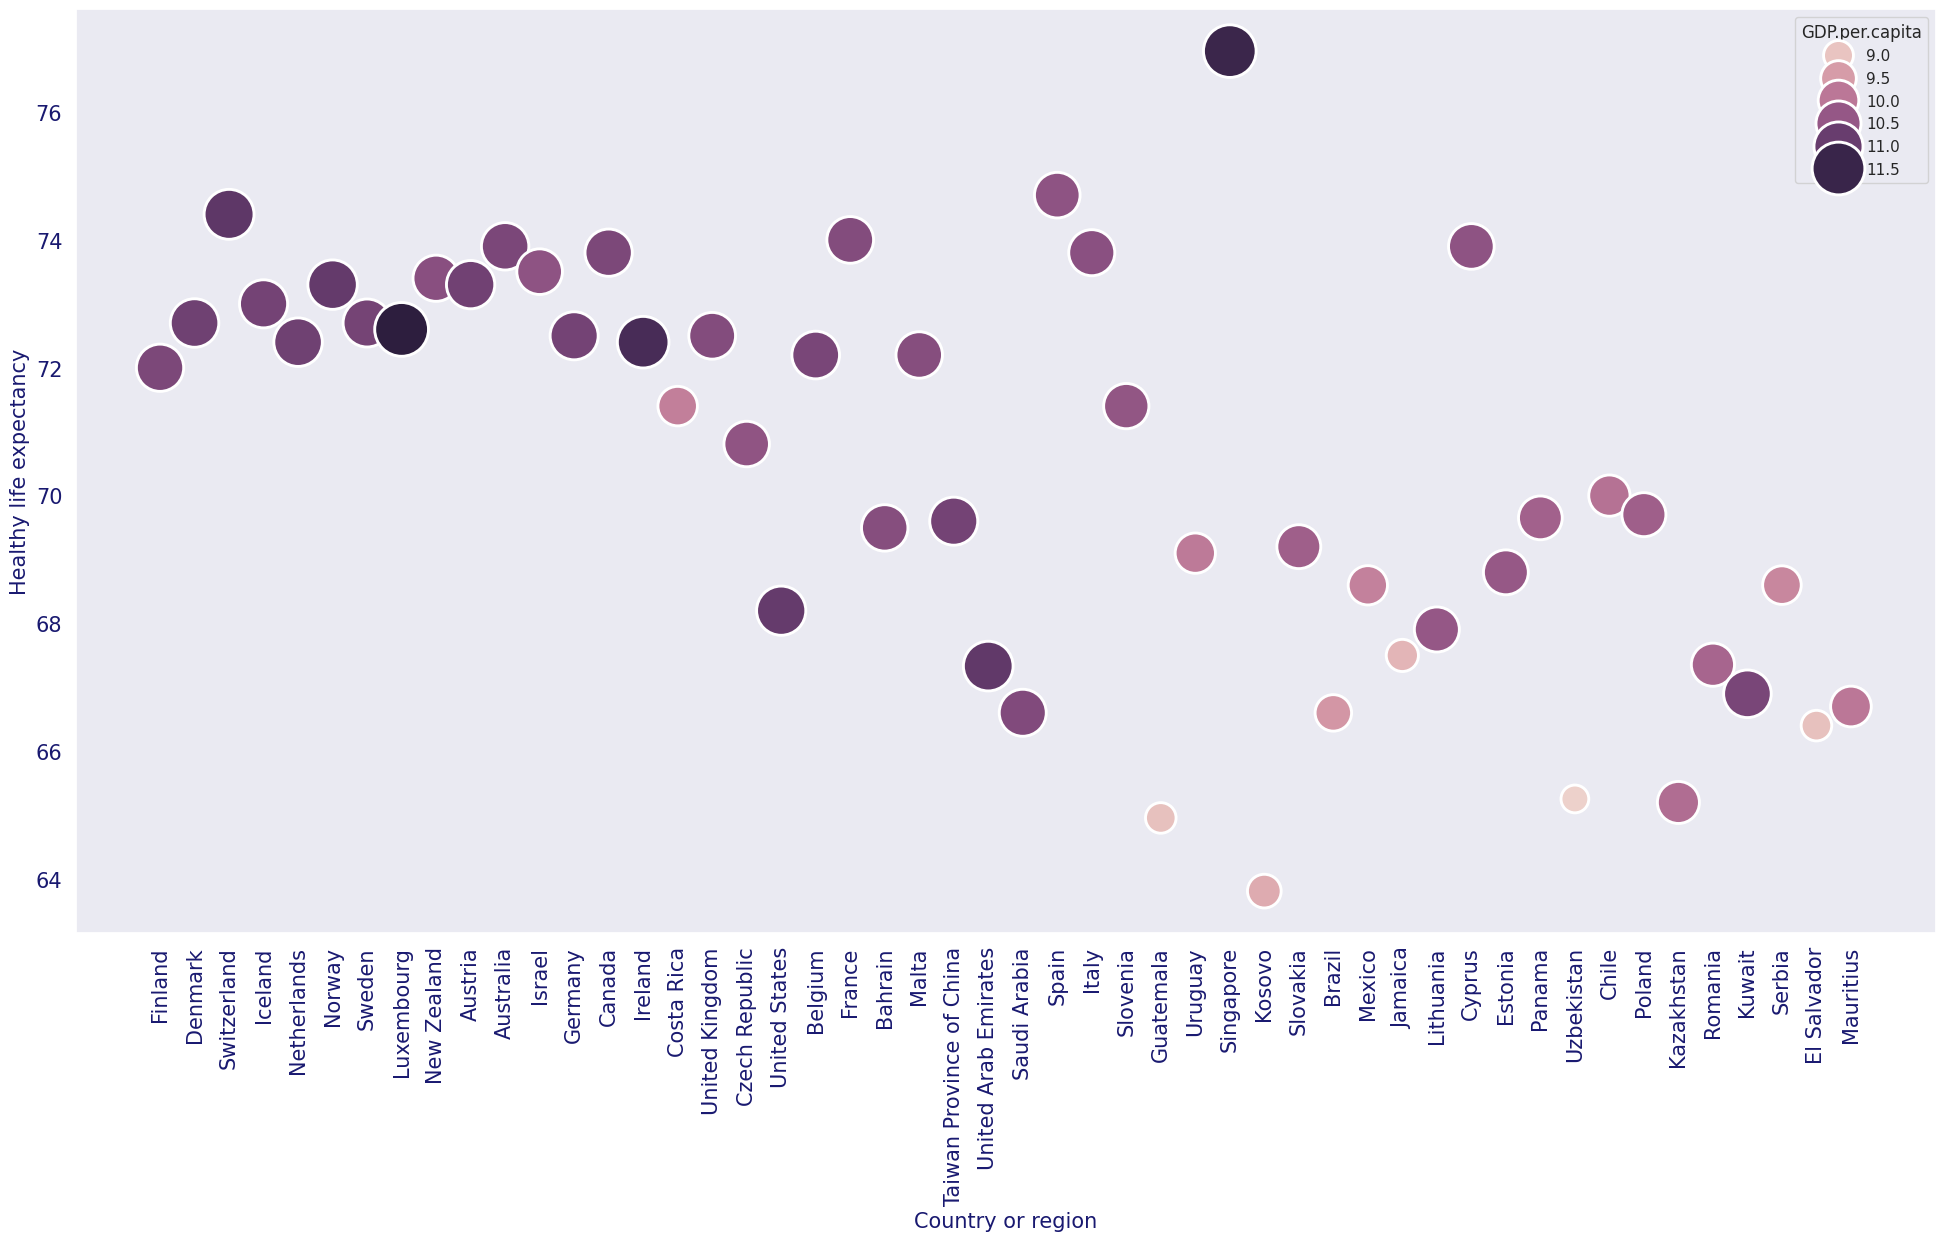

In [ ]:
top50 = df2021.head(50)
sns.set_theme(style='dark')
plt.figure(figsize=(24, 12))
ax = sns.scatterplot(data=top50, x='Country', y='Life.expectancy', size='GDP.per.capita',
                     sizes=(400, 1500), hue='GDP.per.capita')

plt.xticks(rotation=90, fontsize=15, color='midnightblue') # rotation=90 <- 90도 회전
plt.yticks(fontsize=15, color='midnightblue')
plt.xlabel('Country or region', size=15, color='midnightblue')
plt.ylabel('Healthy life expectancy', size=15, color='midnightblue')
plt.show()

- 산점도 그래프 그리기2 :

<Figure size 1000x600 with 0 Axes>

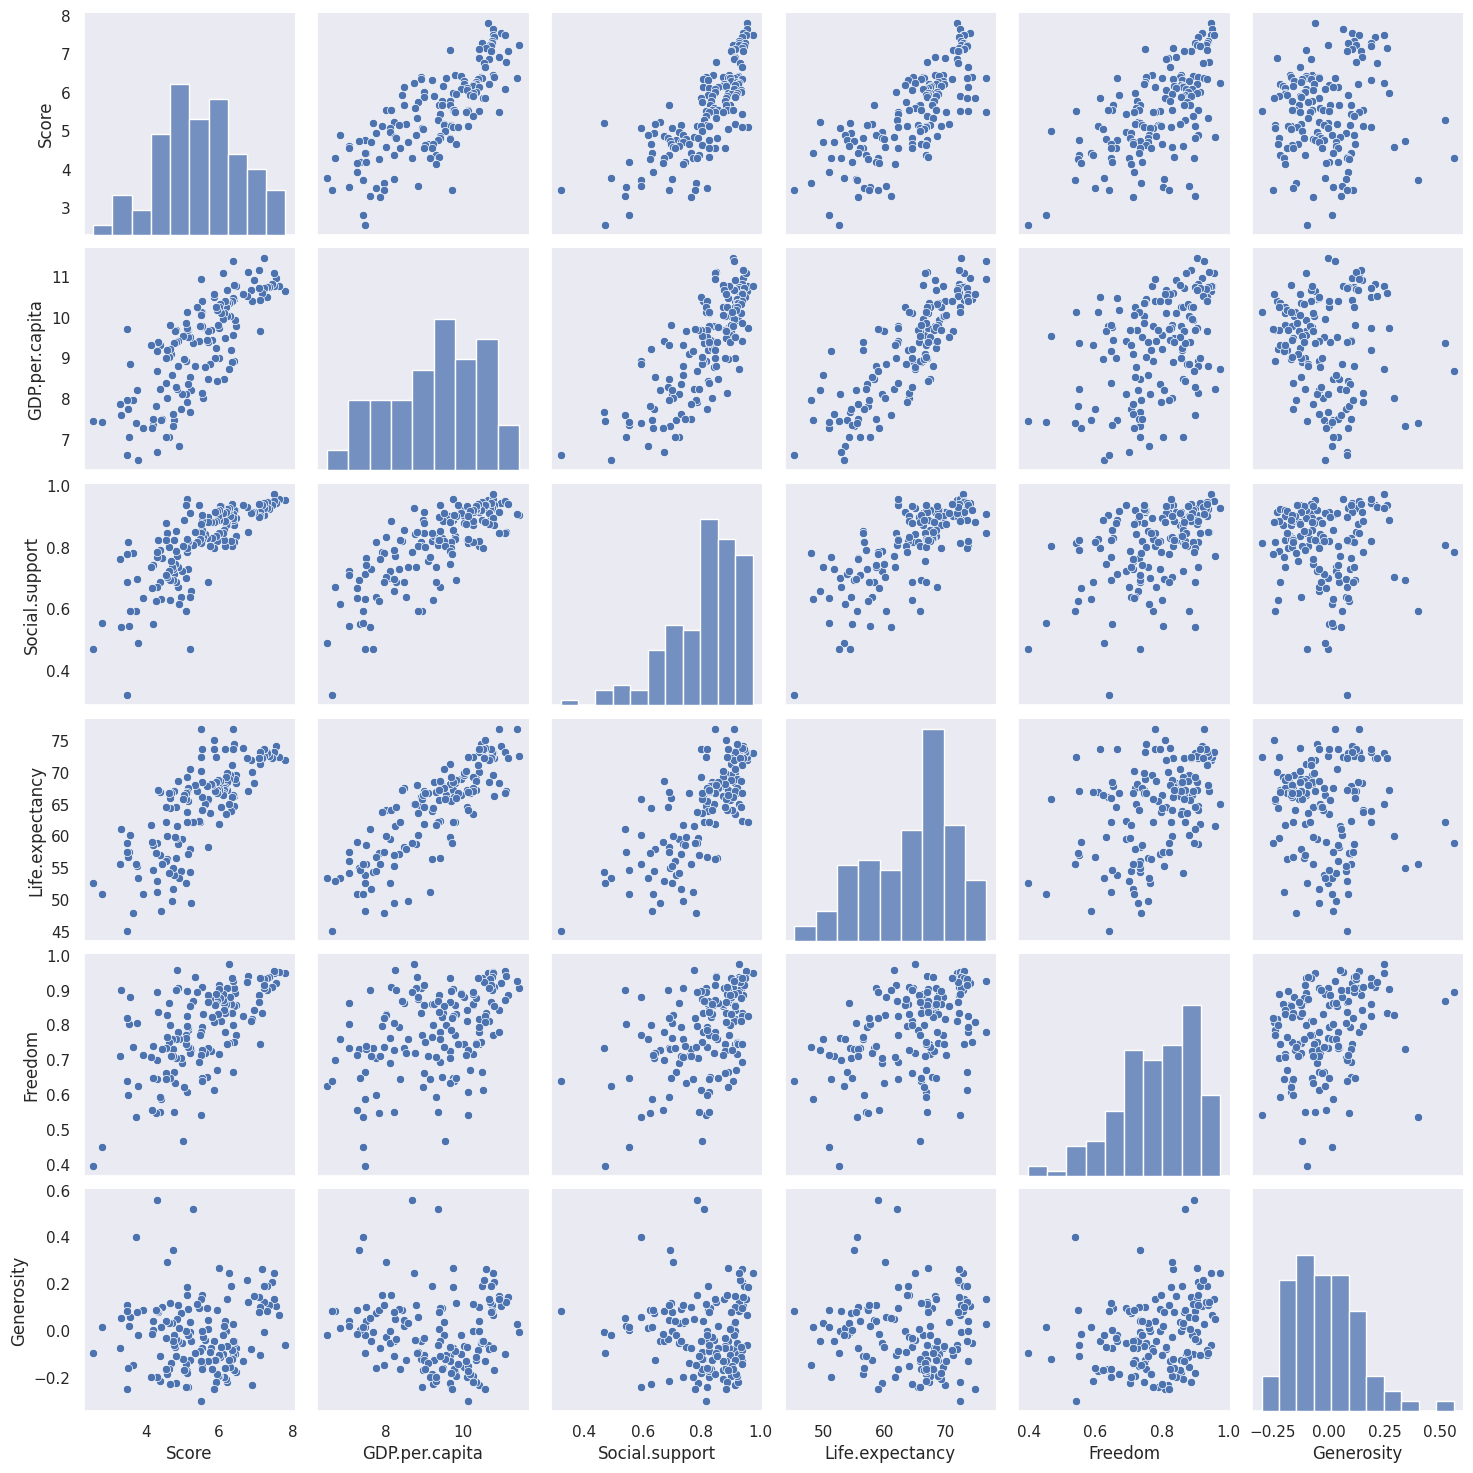

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df2020)

### 8.2 [연관분석] 장바구니 분석하기


##### 1) 필요한 모듈 import

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # 통계분석 지원 lib
from mlxtend.frequent_patterns import apriori, association_rules

##### 2) 데이터셋 생성 및 가공

- transform() :파이썬 리스트를 one-hot 인코
딩 배열로 변환

In [ ]:
# 데이터셋 생성 및 가공
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
           ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder() # : 데이터 셋을 머신러닝 모듈에 적합한 "배열 형태로 변환"
te_ary = te.fit(dataset).transform(dataset) # fit은 내부적으로 라벨링함.
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Beans,Coke,Cookie,Corn,Eggs,Ice cream,Kidney Beans,Milk,Orange,Yogurt
0,True,True,False,True,False,True,False,False,True,False,True
1,True,True,True,True,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,True,True,False,False
3,False,True,False,False,True,False,False,False,True,True,True
4,False,True,False,True,True,True,True,False,False,False,False


##### 3) 연관분석 규칙 결과 활용 - Apriori알고리즘 적용

In [ ]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True) # 최소지지도는 0.5라고 설정해서
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
1,0.8,(Beans)
3,0.8,(Eggs)
0,0.6,(Apple)
2,0.6,(Cookie)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Beans, Cookie)"
8,0.6,"(Beans, Eggs)"
9,0.6,"(Beans, Yogurt)"


- 연관규칙 분석 결과를 필터링하기

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True) # 최소지지도 0.6
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Apple),1
1,0.8,(Beans),1
2,0.6,(Cookie),1
3,0.8,(Eggs),1
4,0.6,(Milk),1
5,0.6,(Yogurt),1
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Beans, Eggs)",2
9,0.6,"(Beans, Yogurt)",2


- 연관규칙 분석 결과를 필터링해보기

In [ ]:
frequent_itemsets1 = frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6)]
frequent_itemsets1

,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Beans, Eggs)",2
9,0.6,"(Beans, Yogurt)",2
10,0.6,"(Cookie, Eggs)",2


##### 4) 관심 항목 대상으로 지지도(Support), 신뢰도(Confidence), 향상도(Lift) 확인하기

- association_rules 함수 이용: lift>=0.8

In [ ]:
rules1=association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.00,0.75,0.375,0.875
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.50,0.75,1.000,0.875
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.00,0.75,0.375,0.875
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.50,0.75,1.000,0.875
4,(Beans),(Eggs),0.8,0.8,0.6,0.75,0.937500,1.0,-0.04,0.8,-0.25,0.60,-0.250,0.750
5,(Eggs),(Beans),0.8,0.8,0.6,0.75,0.937500,1.0,-0.04,0.8,-0.25,0.60,-0.250,0.750
6,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.00,0.75,0.375,0.875
7,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.50,0.75,1.000,0.875
8,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.50,0.75,1.000,0.875
9,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.00,0.75,0.375,0.875


In [ ]:
frequent_itemsets1 = frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6)]
frequent_itemsets1

,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Beans, Cookie)",2
8,0.6,"(Beans, Eggs)",2
9,0.6,"(Beans, Yogurt)",2
10,0.6,"(Cookie, Eggs)",2


- association_rules 함수 이용: lift>=1.2

In [ ]:
# association_rules 함수 이용: lift >= 1.2
rules2 = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Apple),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.0,0.75,0.375,0.875
1,(Apple),(Eggs),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.5,0.75,1.000,0.875
2,(Beans),(Cookie),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.0,0.75,0.375,0.875
3,(Cookie),(Beans),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.5,0.75,1.000,0.875
4,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.0,0.75,0.375,0.875
5,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.5,0.75,1.000,0.875
6,(Cookie),(Eggs),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.5,0.75,1.000,0.875
7,(Eggs),(Cookie),0.8,0.6,0.6,0.75,1.250000,1.0,0.12,1.6,1.0,0.75,0.375,0.875
8,"(Beans, Cookie)",(Eggs),0.6,0.8,0.6,1.00,1.250000,1.0,0.12,inf,0.5,0.75,1.000,0.875
9,"(Beans, Eggs)",(Cookie),0.6,0.6,0.6,1.00,1.666667,1.0,0.24,inf,1.0,1.00,1.000,1.000
